## Import the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the data set

In [3]:
df = pd.read_csv('Absenteeism_preprocessed2.csv')

In [4]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,month,Day of year,Day of week
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4,7,188,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,7,195,1
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2,7,196,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,4,7,197,3
4,0,0,0,1,289,36,33,239.554,30,1,2,1,2,7,204,3


In [5]:
df['Education'].nunique()

4

## Targets

In [6]:
df['Absenteeism Time in Hours'].median()

3.0

**If Values is >3 then targe is 1 or else 0**

In [7]:
targets= np.where(df['Absenteeism Time in Hours']>3,0,1)

In [8]:
df['Excessive Absentees']=targets

In [9]:
df=df.drop('Absenteeism Time in Hours',axis=1)

In [10]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,month,Day of year,Day of week,Excessive Absentees
0,0,0,0,1,289,36,33,239.554,30,1,2,1,7,188,1,0
1,0,0,0,0,118,13,50,239.554,31,1,1,0,7,195,1,1
2,0,0,0,1,179,51,38,239.554,31,1,0,0,7,196,2,1
3,1,0,0,0,279,5,39,239.554,24,1,2,0,7,197,3,0
4,0,0,0,1,289,36,33,239.554,30,1,2,1,7,204,3,1


In [11]:
df['Excessive Absentees'].value_counts()

1    381
0    319
Name: Excessive Absentees, dtype: int64

## Splitting the data

In [12]:
X= df.drop('Excessive Absentees',axis=1)
y= df['Excessive Absentees']

In [13]:
X.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,month,Day of year,Day of week
0,0,0,0,1,289,36,33,239.554,30,1,2,1,7,188,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0,7,195,1
2,0,0,0,1,179,51,38,239.554,31,1,0,0,7,196,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,7,197,3
4,0,0,0,1,289,36,33,239.554,30,1,2,1,7,204,3


In [14]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Excessive Absentees, dtype: int32

In [15]:
from scipy import stats
df[(np.abs(stats.zscore(df))<3).all(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reason_1                 700 non-null    int64  
 1   Reason_2                 700 non-null    int64  
 2   Reason_3                 700 non-null    int64  
 3   Reason_4                 700 non-null    int64  
 4   Transportation Expense   700 non-null    int64  
 5   Distance to Work         700 non-null    int64  
 6   Age                      700 non-null    int64  
 7   Daily Work Load Average  700 non-null    float64
 8   Body Mass Index          700 non-null    int64  
 9   Education                700 non-null    int64  
 10  Children                 700 non-null    int64  
 11  Pets                     700 non-null    int64  
 12  month                    700 non-null    int64  
 13  Day of year              700 non-null    int64  
 14  Day of week              7

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing Data

In [18]:
from sklearn.preprocessing import StandardScaler
Sc= StandardScaler()

In [19]:
X_train= Sc.fit_transform(X_train)
X_test= Sc.transform(X_test)

## ML Model

### RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier 
M1= RandomForestClassifier()

In [21]:
M1.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
M1.feature_importances_

array([0.06918968, 0.00089393, 0.03369597, 0.06037316, 0.09288896,
       0.05149483, 0.06089521, 0.15009539, 0.05595526, 0.01418555,
       0.04162427, 0.02074148, 0.0967444 , 0.1597358 , 0.0914861 ])

In [23]:
a=df.columns

In [24]:
feature_imp = pd.DataFrame(M1.feature_importances_,index=a[0:15] )
feature_imp

,0
Reason_1,0.069190
Reason_2,0.000894
Reason_3,0.033696
Reason_4,0.060373
Transportation Expense,0.092889
Distance to Work,0.051495
Age,0.060895
Daily Work Load Average,0.150095
Body Mass Index,0.055955
Education,0.014186


In [25]:
P1=M1.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,accuracy_score
print(classification_report(y_test,P1))
print('\n')
print(confusion_matrix(y_test, P1))
print('\n')
print(accuracy_score(y_test, P1))
print('\n')
accuracy = accuracy_score(y_test, P1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P1))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        58
           1       0.80      0.80      0.80        82

    accuracy                           0.77       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.77      0.77      0.77       140



[[42 16]
 [16 66]]


0.7714285714285715


Accuracy: 77.14%
ROC AUC Score 0.7645079899074853


### Predictions and Evaluations From Top feature

In [27]:
from sklearn.feature_selection import RFE

In [28]:
M2 = RFE(M1,n_features_to_select=4)

In [29]:
M2.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=4)

In [30]:
P2=M2.predict(X_test)

In [31]:
print(classification_report(y_test,P2))
print('\n')
print(confusion_matrix(y_test, P2))
print('\n')
print(accuracy_score(y_test, P2))
print('\n')
accuracy = accuracy_score(y_test, P2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P2))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.62      0.57      0.59        58
           1       0.71      0.76      0.73        82

    accuracy                           0.68       140
   macro avg       0.67      0.66      0.66       140
weighted avg       0.68      0.68      0.68       140



[[33 25]
 [20 62]]


0.6785714285714286


Accuracy: 67.86%
ROC AUC Score 0.6625315391084945


## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
M3=DecisionTreeClassifier()

In [33]:
M3.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
P3= M3.predict(X_test)

In [35]:
print(classification_report(y_test,P3))
print('\n')
print(confusion_matrix(y_test, P3))
print('\n')
print(accuracy_score(y_test, P3))
print('\n')
accuracy = accuracy_score(y_test, P3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P3))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.73      0.66      0.69        58
           1       0.77      0.83      0.80        82

    accuracy                           0.76       140
   macro avg       0.75      0.74      0.75       140
weighted avg       0.76      0.76      0.75       140



[[38 20]
 [14 68]]


0.7571428571428571


Accuracy: 75.71%
ROC AUC Score 0.742220353238015


## Support Vector Machine

In [36]:
from sklearn.svm import SVC

In [37]:
M4= SVC()

In [38]:
M4.fit(X_train,y_train)

SVC()

In [39]:
P4= M4.predict(X_test)

In [40]:
print(classification_report(y_test,P4))
print('\n')
print(confusion_matrix(y_test, P4))
print('\n')
print(accuracy_score(y_test, P4))
print('\n')
accuracy = accuracy_score(y_test, P4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P4))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        58
           1       0.82      0.78      0.80        82

    accuracy                           0.77       140
   macro avg       0.77      0.77      0.77       140
weighted avg       0.77      0.77      0.77       140



[[44 14]
 [18 64]]


0.7714285714285715


Accuracy: 77.14%
ROC AUC Score 0.7695542472666106


### Gridsearch

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {'C': [0.1,1, 10, 100, 1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

In [43]:
gr=GridSearchCV(SVC(),param_grid)

In [44]:
gr.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [45]:
gr.best_estimator_

SVC(C=1000, gamma=0.001)

In [46]:
P4=gr.predict(X_test)

In [47]:
print(classification_report(y_test,P4))
print('\n')
print(confusion_matrix(y_test, P4))
print('\n')
print(accuracy_score(y_test, P4))
print('\n')
accuracy = accuracy_score(y_test, P4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P4))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        58
           1       0.81      0.79      0.80        82

    accuracy                           0.77       140
   macro avg       0.76      0.77      0.77       140
weighted avg       0.77      0.77      0.77       140



[[43 15]
 [17 65]]


0.7714285714285715


Accuracy: 77.14%
ROC AUC Score 0.7670311185870481


## Naive Bayes classifier

In [48]:
from sklearn.naive_bayes import GaussianNB
M5=GaussianNB()

In [49]:
M5.fit(X_train,y_train)

GaussianNB()

In [50]:
P5=M5.predict(X_test)

In [51]:
print(classification_report(y_test,P5))
print('\n')
print(confusion_matrix(y_test, P5))
print('\n')
print(accuracy_score(y_test, P5))
print('\n')
accuracy = accuracy_score(y_test, P5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P5))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        58
           1       0.75      0.80      0.78        82

    accuracy                           0.73       140
   macro avg       0.72      0.71      0.72       140
weighted avg       0.73      0.73      0.73       140



[[36 22]
 [16 66]]


0.7285714285714285


Accuracy: 72.86%
ROC AUC Score 0.7127838519764509


## KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
error_Mat=[]
for i in range (1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))

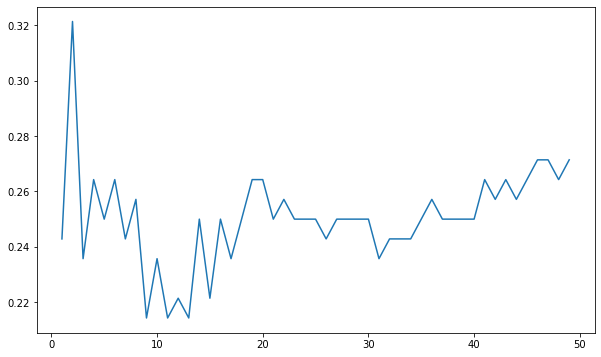

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range (1,50),error_Mat)

In [55]:
M6= KNeighborsClassifier(n_neighbors=9)

In [56]:
M6.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [57]:
P6=M6.predict(X_test)

In [58]:
print(classification_report(y_test,P6))
print('\n')
print(confusion_matrix(y_test, P6))
print('\n')
print(accuracy_score(y_test, P6))
print('\n')
accuracy = accuracy_score(y_test, P6)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P6))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        58
           1       0.82      0.82      0.82        82

    accuracy                           0.79       140
   macro avg       0.78      0.78      0.78       140
weighted avg       0.79      0.79      0.79       140



[[43 15]
 [15 67]]


0.7857142857142857


Accuracy: 78.57%
ROC AUC Score 0.7792262405382674


## LogisticRegression

In [59]:
from sklearn.linear_model import LogisticRegression
M7= LogisticRegression()

In [60]:
M7.fit(X_train,y_train)

LogisticRegression()

In [61]:
P7 = M7.predict(X_test)

In [62]:
print(classification_report(y_test,P7))
print('\n')
print(confusion_matrix(y_test, P7))
print('\n')
print(accuracy_score(y_test, P7))
print('\n')
accuracy = accuracy_score(y_test, P7)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P7))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        58
           1       0.79      0.80      0.80        82

    accuracy                           0.76       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.76      0.76      0.76       140



[[40 18]
 [16 66]]


0.7571428571428571


Accuracy: 75.71%
ROC AUC Score 0.7472666105971406


## GB Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
M8=GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=2)

In [65]:
M8.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2)

In [66]:
P8=M8.predict(X_test)

In [67]:
print(classification_report(y_test,P8))
print('\n')
print(confusion_matrix(y_test, P8))
print('\n')
print(accuracy_score(y_test, P8))
print('\n')
accuracy = accuracy_score(y_test, P8)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P8))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        58
           1       0.82      0.79      0.81        82

    accuracy                           0.78       140
   macro avg       0.77      0.78      0.77       140
weighted avg       0.78      0.78      0.78       140



[[44 14]
 [17 65]]


0.7785714285714286


Accuracy: 77.86%
ROC AUC Score 0.7756518082422204


## Histogram Boosting Classifier

In [68]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [69]:
M9= HistGradientBoostingClassifier()

In [70]:
M9.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [71]:
P9=M9.predict(X_test)

In [72]:
print(classification_report(y_test,P9))
print('\n')
print(confusion_matrix(y_test, P9))
print('\n')
print(accuracy_score(y_test, P9))
print('\n')
accuracy = accuracy_score(y_test, P9)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P9))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        58
           1       0.80      0.85      0.83        82

    accuracy                           0.79       140
   macro avg       0.79      0.78      0.78       140
weighted avg       0.79      0.79      0.79       140



[[41 17]
 [12 70]]


0.7928571428571428


Accuracy: 79.29%
ROC AUC Score 0.7802775441547518


## XGB Boosting

In [73]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [74]:
M10=XGBClassifier()

In [75]:
from sklearn.model_selection import KFold , cross_val_score

In [76]:
kfold= KFold(n_splits=6, shuffle=False, random_state=None)
scores= cross_val_score(M10, X_train, y_train, cv=kfold,verbose=False)

[12:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:28:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:28:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:28:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [77]:
scores

array([0.67021277, 0.78723404, 0.80645161, 0.6344086 , 0.7311828 ,
       0.7311828 ])

In [78]:
M10.fit(X_train,y_train)

[12:28:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
P10= M10.predict(X_test)

In [80]:
print(classification_report(y_test,P10))
print('\n')
print(confusion_matrix(y_test, P10))
print('\n')
print(accuracy_score(y_test, P10))
print('\n')
accuracy = accuracy_score(y_test, P10)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P10))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        58
           1       0.78      0.76      0.77        82

    accuracy                           0.74       140
   macro avg       0.73      0.73      0.73       140
weighted avg       0.74      0.74      0.74       140



[[41 17]
 [20 62]]


0.7357142857142858


Accuracy: 73.57%
ROC AUC Score 0.7314970563498738


## Light GBM

In [81]:
from lightgbm import LGBMClassifier

In [82]:
M11=LGBMClassifier()

In [83]:
Kfold=KFold(n_splits=5, shuffle=False, random_state=None)
score=cross_val_score(M11,X_train,y_train,cv=Kfold)
score

array([0.71428571, 0.78571429, 0.69642857, 0.65178571, 0.74107143])

In [84]:
M11.fit(X_train,y_train)

LGBMClassifier()

In [85]:
P11=M11.predict(X_test)

In [86]:
print(classification_report(y_test,P11))
print('\n')
print(confusion_matrix(y_test, P11))
print('\n')
print(accuracy_score(y_test, P11))
print('\n')
accuracy = accuracy_score(y_test, P11)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P11))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        58
           1       0.80      0.85      0.83        82

    accuracy                           0.79       140
   macro avg       0.79      0.78      0.78       140
weighted avg       0.79      0.79      0.79       140



[[41 17]
 [12 70]]


0.7928571428571428


Accuracy: 79.29%
ROC AUC Score 0.7802775441547518


## CAT Boosting

In [87]:
from catboost import CatBoostClassifier

In [88]:
M12= CatBoostClassifier()

In [89]:
score=cross_val_score(M12,X_train,y_train,cv=kfold,verbose=False)

Learning rate set to 0.007436
0:	learn: 0.6909017	total: 147ms	remaining: 2m 26s
1:	learn: 0.6888694	total: 151ms	remaining: 1m 15s
2:	learn: 0.6869222	total: 155ms	remaining: 51.4s
3:	learn: 0.6842449	total: 159ms	remaining: 39.5s
4:	learn: 0.6822591	total: 162ms	remaining: 32.2s
5:	learn: 0.6797521	total: 165ms	remaining: 27.3s
6:	learn: 0.6769089	total: 168ms	remaining: 23.9s
7:	learn: 0.6745429	total: 173ms	remaining: 21.5s
8:	learn: 0.6717615	total: 176ms	remaining: 19.4s
9:	learn: 0.6703149	total: 177ms	remaining: 17.5s
10:	learn: 0.6682441	total: 180ms	remaining: 16.1s
11:	learn: 0.6658722	total: 183ms	remaining: 15.1s
12:	learn: 0.6627959	total: 186ms	remaining: 14.1s
13:	learn: 0.6605584	total: 189ms	remaining: 13.3s
14:	learn: 0.6584618	total: 192ms	remaining: 12.6s
15:	learn: 0.6562154	total: 195ms	remaining: 12s
16:	learn: 0.6542473	total: 197ms	remaining: 11.4s
17:	learn: 0.6521296	total: 201ms	remaining: 11s
18:	learn: 0.6502595	total: 204ms	remaining: 10.6s
19:	learn: 0.

192:	learn: 0.4726208	total: 680ms	remaining: 2.84s
193:	learn: 0.4720530	total: 683ms	remaining: 2.84s
194:	learn: 0.4712066	total: 686ms	remaining: 2.83s
195:	learn: 0.4708198	total: 689ms	remaining: 2.82s
196:	learn: 0.4702184	total: 691ms	remaining: 2.82s
197:	learn: 0.4697443	total: 694ms	remaining: 2.81s
198:	learn: 0.4691041	total: 697ms	remaining: 2.8s
199:	learn: 0.4684719	total: 700ms	remaining: 2.8s
200:	learn: 0.4682411	total: 702ms	remaining: 2.79s
201:	learn: 0.4677418	total: 705ms	remaining: 2.79s
202:	learn: 0.4674465	total: 708ms	remaining: 2.78s
203:	learn: 0.4672309	total: 711ms	remaining: 2.77s
204:	learn: 0.4668613	total: 714ms	remaining: 2.77s
205:	learn: 0.4665775	total: 719ms	remaining: 2.77s
206:	learn: 0.4661245	total: 724ms	remaining: 2.77s
207:	learn: 0.4655284	total: 728ms	remaining: 2.77s
208:	learn: 0.4648770	total: 732ms	remaining: 2.77s
209:	learn: 0.4643307	total: 735ms	remaining: 2.76s
210:	learn: 0.4637284	total: 738ms	remaining: 2.76s
211:	learn: 0.

355:	learn: 0.4082485	total: 1.16s	remaining: 2.11s
356:	learn: 0.4081455	total: 1.17s	remaining: 2.1s
357:	learn: 0.4077157	total: 1.17s	remaining: 2.1s
358:	learn: 0.4073319	total: 1.17s	remaining: 2.09s
359:	learn: 0.4069829	total: 1.18s	remaining: 2.09s
360:	learn: 0.4064308	total: 1.18s	remaining: 2.09s
361:	learn: 0.4062002	total: 1.18s	remaining: 2.08s
362:	learn: 0.4056582	total: 1.18s	remaining: 2.08s
363:	learn: 0.4053538	total: 1.19s	remaining: 2.07s
364:	learn: 0.4049482	total: 1.19s	remaining: 2.07s
365:	learn: 0.4045601	total: 1.19s	remaining: 2.07s
366:	learn: 0.4043158	total: 1.2s	remaining: 2.06s
367:	learn: 0.4039110	total: 1.2s	remaining: 2.06s
368:	learn: 0.4035078	total: 1.2s	remaining: 2.05s
369:	learn: 0.4031537	total: 1.2s	remaining: 2.05s
370:	learn: 0.4027355	total: 1.21s	remaining: 2.04s
371:	learn: 0.4025667	total: 1.21s	remaining: 2.04s
372:	learn: 0.4022252	total: 1.21s	remaining: 2.04s
373:	learn: 0.4018414	total: 1.21s	remaining: 2.03s
374:	learn: 0.4015

547:	learn: 0.3546426	total: 1.67s	remaining: 1.38s
548:	learn: 0.3545125	total: 1.68s	remaining: 1.38s
549:	learn: 0.3542193	total: 1.68s	remaining: 1.37s
550:	learn: 0.3540786	total: 1.68s	remaining: 1.37s
551:	learn: 0.3536837	total: 1.69s	remaining: 1.37s
552:	learn: 0.3532415	total: 1.69s	remaining: 1.36s
553:	learn: 0.3529814	total: 1.69s	remaining: 1.36s
554:	learn: 0.3527887	total: 1.69s	remaining: 1.36s
555:	learn: 0.3524385	total: 1.7s	remaining: 1.35s
556:	learn: 0.3520923	total: 1.7s	remaining: 1.35s
557:	learn: 0.3518285	total: 1.7s	remaining: 1.35s
558:	learn: 0.3515207	total: 1.7s	remaining: 1.34s
559:	learn: 0.3513354	total: 1.71s	remaining: 1.34s
560:	learn: 0.3509170	total: 1.71s	remaining: 1.34s
561:	learn: 0.3506984	total: 1.71s	remaining: 1.33s
562:	learn: 0.3505061	total: 1.72s	remaining: 1.33s
563:	learn: 0.3502697	total: 1.72s	remaining: 1.33s
564:	learn: 0.3499488	total: 1.72s	remaining: 1.32s
565:	learn: 0.3497111	total: 1.72s	remaining: 1.32s
566:	learn: 0.34

713:	learn: 0.3191436	total: 2.17s	remaining: 872ms
714:	learn: 0.3189040	total: 2.18s	remaining: 868ms
715:	learn: 0.3186546	total: 2.18s	remaining: 865ms
716:	learn: 0.3184487	total: 2.18s	remaining: 862ms
717:	learn: 0.3183795	total: 2.19s	remaining: 860ms
718:	learn: 0.3181381	total: 2.19s	remaining: 857ms
719:	learn: 0.3179736	total: 2.19s	remaining: 854ms
720:	learn: 0.3178164	total: 2.2s	remaining: 850ms
721:	learn: 0.3176879	total: 2.2s	remaining: 847ms
722:	learn: 0.3174411	total: 2.2s	remaining: 844ms
723:	learn: 0.3172086	total: 2.21s	remaining: 841ms
724:	learn: 0.3169052	total: 2.21s	remaining: 838ms
725:	learn: 0.3166126	total: 2.21s	remaining: 835ms
726:	learn: 0.3163753	total: 2.21s	remaining: 832ms
727:	learn: 0.3162061	total: 2.22s	remaining: 829ms
728:	learn: 0.3157829	total: 2.22s	remaining: 826ms
729:	learn: 0.3156592	total: 2.23s	remaining: 824ms
730:	learn: 0.3154278	total: 2.23s	remaining: 821ms
731:	learn: 0.3153135	total: 2.23s	remaining: 819ms
732:	learn: 0.3

890:	learn: 0.2857346	total: 2.68s	remaining: 328ms
891:	learn: 0.2856541	total: 2.68s	remaining: 325ms
892:	learn: 0.2854502	total: 2.69s	remaining: 322ms
893:	learn: 0.2853409	total: 2.69s	remaining: 319ms
894:	learn: 0.2851072	total: 2.69s	remaining: 316ms
895:	learn: 0.2849676	total: 2.69s	remaining: 313ms
896:	learn: 0.2849001	total: 2.7s	remaining: 310ms
897:	learn: 0.2848021	total: 2.7s	remaining: 307ms
898:	learn: 0.2845873	total: 2.7s	remaining: 304ms
899:	learn: 0.2843714	total: 2.7s	remaining: 300ms
900:	learn: 0.2841483	total: 2.71s	remaining: 297ms
901:	learn: 0.2839405	total: 2.71s	remaining: 295ms
902:	learn: 0.2837562	total: 2.72s	remaining: 292ms
903:	learn: 0.2835359	total: 2.72s	remaining: 289ms
904:	learn: 0.2832991	total: 2.72s	remaining: 286ms
905:	learn: 0.2830985	total: 2.73s	remaining: 283ms
906:	learn: 0.2829462	total: 2.73s	remaining: 280ms
907:	learn: 0.2827811	total: 2.73s	remaining: 277ms
908:	learn: 0.2827080	total: 2.74s	remaining: 274ms
909:	learn: 0.28

61:	learn: 0.5835151	total: 166ms	remaining: 2.5s
62:	learn: 0.5818444	total: 169ms	remaining: 2.51s
63:	learn: 0.5808436	total: 171ms	remaining: 2.51s
64:	learn: 0.5791419	total: 174ms	remaining: 2.5s
65:	learn: 0.5778859	total: 177ms	remaining: 2.5s
66:	learn: 0.5765177	total: 179ms	remaining: 2.49s
67:	learn: 0.5750278	total: 182ms	remaining: 2.49s
68:	learn: 0.5735907	total: 185ms	remaining: 2.49s
69:	learn: 0.5722043	total: 187ms	remaining: 2.48s
70:	learn: 0.5708089	total: 190ms	remaining: 2.48s
71:	learn: 0.5695554	total: 193ms	remaining: 2.48s
72:	learn: 0.5682445	total: 195ms	remaining: 2.48s
73:	learn: 0.5678249	total: 198ms	remaining: 2.48s
74:	learn: 0.5666622	total: 201ms	remaining: 2.48s
75:	learn: 0.5653473	total: 204ms	remaining: 2.48s
76:	learn: 0.5645550	total: 206ms	remaining: 2.47s
77:	learn: 0.5629486	total: 209ms	remaining: 2.47s
78:	learn: 0.5621264	total: 212ms	remaining: 2.46s
79:	learn: 0.5612798	total: 214ms	remaining: 2.46s
80:	learn: 0.5605698	total: 217ms	

237:	learn: 0.4572590	total: 668ms	remaining: 2.14s
238:	learn: 0.4568418	total: 671ms	remaining: 2.14s
239:	learn: 0.4566400	total: 674ms	remaining: 2.13s
240:	learn: 0.4562022	total: 676ms	remaining: 2.13s
241:	learn: 0.4556487	total: 679ms	remaining: 2.13s
242:	learn: 0.4551767	total: 682ms	remaining: 2.12s
243:	learn: 0.4547325	total: 685ms	remaining: 2.12s
244:	learn: 0.4542861	total: 687ms	remaining: 2.12s
245:	learn: 0.4536564	total: 690ms	remaining: 2.12s
246:	learn: 0.4534280	total: 693ms	remaining: 2.11s
247:	learn: 0.4527736	total: 696ms	remaining: 2.11s
248:	learn: 0.4527681	total: 697ms	remaining: 2.1s
249:	learn: 0.4522081	total: 700ms	remaining: 2.1s
250:	learn: 0.4516627	total: 704ms	remaining: 2.1s
251:	learn: 0.4511636	total: 707ms	remaining: 2.1s
252:	learn: 0.4508633	total: 710ms	remaining: 2.1s
253:	learn: 0.4503790	total: 712ms	remaining: 2.09s
254:	learn: 0.4500190	total: 715ms	remaining: 2.09s
255:	learn: 0.4495961	total: 717ms	remaining: 2.08s
256:	learn: 0.449

406:	learn: 0.4006087	total: 1.17s	remaining: 1.7s
407:	learn: 0.4003216	total: 1.17s	remaining: 1.7s
408:	learn: 0.4000650	total: 1.18s	remaining: 1.7s
409:	learn: 0.3997817	total: 1.18s	remaining: 1.7s
410:	learn: 0.3996323	total: 1.18s	remaining: 1.69s
411:	learn: 0.3993952	total: 1.18s	remaining: 1.69s
412:	learn: 0.3992338	total: 1.19s	remaining: 1.69s
413:	learn: 0.3989859	total: 1.19s	remaining: 1.68s
414:	learn: 0.3987086	total: 1.19s	remaining: 1.68s
415:	learn: 0.3984980	total: 1.19s	remaining: 1.68s
416:	learn: 0.3984380	total: 1.2s	remaining: 1.67s
417:	learn: 0.3983083	total: 1.2s	remaining: 1.67s
418:	learn: 0.3979520	total: 1.2s	remaining: 1.67s
419:	learn: 0.3976136	total: 1.21s	remaining: 1.67s
420:	learn: 0.3972681	total: 1.21s	remaining: 1.66s
421:	learn: 0.3969548	total: 1.21s	remaining: 1.66s
422:	learn: 0.3966524	total: 1.21s	remaining: 1.66s
423:	learn: 0.3963581	total: 1.22s	remaining: 1.65s
424:	learn: 0.3960665	total: 1.22s	remaining: 1.65s
425:	learn: 0.39588

593:	learn: 0.3506810	total: 1.67s	remaining: 1.14s
594:	learn: 0.3504594	total: 1.67s	remaining: 1.14s
595:	learn: 0.3500574	total: 1.67s	remaining: 1.14s
596:	learn: 0.3497065	total: 1.68s	remaining: 1.13s
597:	learn: 0.3494784	total: 1.68s	remaining: 1.13s
598:	learn: 0.3491966	total: 1.68s	remaining: 1.13s
599:	learn: 0.3490358	total: 1.69s	remaining: 1.12s
600:	learn: 0.3488954	total: 1.69s	remaining: 1.12s
601:	learn: 0.3485830	total: 1.69s	remaining: 1.12s
602:	learn: 0.3484182	total: 1.69s	remaining: 1.11s
603:	learn: 0.3481199	total: 1.7s	remaining: 1.11s
604:	learn: 0.3480327	total: 1.7s	remaining: 1.11s
605:	learn: 0.3477126	total: 1.7s	remaining: 1.11s
606:	learn: 0.3473822	total: 1.71s	remaining: 1.1s
607:	learn: 0.3472098	total: 1.71s	remaining: 1.1s
608:	learn: 0.3470521	total: 1.71s	remaining: 1.1s
609:	learn: 0.3467444	total: 1.71s	remaining: 1.09s
610:	learn: 0.3466714	total: 1.72s	remaining: 1.09s
611:	learn: 0.3465689	total: 1.72s	remaining: 1.09s
612:	learn: 0.3463

788:	learn: 0.3084162	total: 2.18s	remaining: 582ms
789:	learn: 0.3082648	total: 2.18s	remaining: 580ms
790:	learn: 0.3080499	total: 2.18s	remaining: 577ms
791:	learn: 0.3078382	total: 2.19s	remaining: 574ms
792:	learn: 0.3077246	total: 2.19s	remaining: 571ms
793:	learn: 0.3076249	total: 2.19s	remaining: 568ms
794:	learn: 0.3073289	total: 2.19s	remaining: 566ms
795:	learn: 0.3070545	total: 2.2s	remaining: 563ms
796:	learn: 0.3068658	total: 2.2s	remaining: 560ms
797:	learn: 0.3067302	total: 2.2s	remaining: 557ms
798:	learn: 0.3063171	total: 2.2s	remaining: 555ms
799:	learn: 0.3060758	total: 2.21s	remaining: 552ms
800:	learn: 0.3058467	total: 2.21s	remaining: 549ms
801:	learn: 0.3055914	total: 2.21s	remaining: 547ms
802:	learn: 0.3053269	total: 2.22s	remaining: 544ms
803:	learn: 0.3050323	total: 2.22s	remaining: 541ms
804:	learn: 0.3048652	total: 2.22s	remaining: 538ms
805:	learn: 0.3046889	total: 2.22s	remaining: 535ms
806:	learn: 0.3046367	total: 2.23s	remaining: 533ms
807:	learn: 0.30

964:	learn: 0.2735210	total: 2.67s	remaining: 96.8ms
965:	learn: 0.2734084	total: 2.67s	remaining: 94.1ms
966:	learn: 0.2731891	total: 2.67s	remaining: 91.3ms
967:	learn: 0.2730466	total: 2.68s	remaining: 88.6ms
968:	learn: 0.2729100	total: 2.68s	remaining: 85.8ms
969:	learn: 0.2727809	total: 2.68s	remaining: 83ms
970:	learn: 0.2724989	total: 2.69s	remaining: 80.3ms
971:	learn: 0.2723073	total: 2.69s	remaining: 77.5ms
972:	learn: 0.2721105	total: 2.69s	remaining: 74.7ms
973:	learn: 0.2717375	total: 2.69s	remaining: 72ms
974:	learn: 0.2715598	total: 2.7s	remaining: 69.2ms
975:	learn: 0.2713717	total: 2.7s	remaining: 66.4ms
976:	learn: 0.2713117	total: 2.7s	remaining: 63.6ms
977:	learn: 0.2711275	total: 2.71s	remaining: 60.9ms
978:	learn: 0.2710176	total: 2.71s	remaining: 58.1ms
979:	learn: 0.2708981	total: 2.71s	remaining: 55.4ms
980:	learn: 0.2705841	total: 2.71s	remaining: 52.6ms
981:	learn: 0.2703573	total: 2.72s	remaining: 49.8ms
982:	learn: 0.2702825	total: 2.72s	remaining: 47.1ms


125:	learn: 0.5156170	total: 338ms	remaining: 2.35s
126:	learn: 0.5147687	total: 341ms	remaining: 2.35s
127:	learn: 0.5141540	total: 344ms	remaining: 2.34s
128:	learn: 0.5134032	total: 347ms	remaining: 2.34s
129:	learn: 0.5128087	total: 349ms	remaining: 2.34s
130:	learn: 0.5120864	total: 352ms	remaining: 2.33s
131:	learn: 0.5112403	total: 355ms	remaining: 2.33s
132:	learn: 0.5103436	total: 358ms	remaining: 2.33s
133:	learn: 0.5094613	total: 361ms	remaining: 2.33s
134:	learn: 0.5089135	total: 363ms	remaining: 2.33s
135:	learn: 0.5084625	total: 366ms	remaining: 2.33s
136:	learn: 0.5077918	total: 370ms	remaining: 2.33s
137:	learn: 0.5073439	total: 372ms	remaining: 2.33s
138:	learn: 0.5065005	total: 375ms	remaining: 2.32s
139:	learn: 0.5060467	total: 378ms	remaining: 2.32s
140:	learn: 0.5052964	total: 380ms	remaining: 2.32s
141:	learn: 0.5047540	total: 383ms	remaining: 2.31s
142:	learn: 0.5043121	total: 386ms	remaining: 2.31s
143:	learn: 0.5033594	total: 389ms	remaining: 2.31s
144:	learn: 

310:	learn: 0.4291968	total: 835ms	remaining: 1.85s
311:	learn: 0.4288083	total: 838ms	remaining: 1.85s
312:	learn: 0.4285431	total: 841ms	remaining: 1.84s
313:	learn: 0.4281486	total: 844ms	remaining: 1.84s
314:	learn: 0.4279153	total: 846ms	remaining: 1.84s
315:	learn: 0.4276191	total: 849ms	remaining: 1.84s
316:	learn: 0.4272220	total: 851ms	remaining: 1.83s
317:	learn: 0.4268718	total: 854ms	remaining: 1.83s
318:	learn: 0.4267325	total: 857ms	remaining: 1.83s
319:	learn: 0.4265027	total: 859ms	remaining: 1.83s
320:	learn: 0.4260109	total: 862ms	remaining: 1.82s
321:	learn: 0.4255019	total: 865ms	remaining: 1.82s
322:	learn: 0.4252184	total: 868ms	remaining: 1.82s
323:	learn: 0.4248986	total: 871ms	remaining: 1.82s
324:	learn: 0.4246130	total: 874ms	remaining: 1.81s
325:	learn: 0.4243675	total: 876ms	remaining: 1.81s
326:	learn: 0.4240489	total: 879ms	remaining: 1.81s
327:	learn: 0.4236050	total: 882ms	remaining: 1.81s
328:	learn: 0.4231862	total: 884ms	remaining: 1.8s
329:	learn: 0

484:	learn: 0.3780285	total: 1.34s	remaining: 1.42s
485:	learn: 0.3778647	total: 1.34s	remaining: 1.42s
486:	learn: 0.3776087	total: 1.34s	remaining: 1.41s
487:	learn: 0.3774053	total: 1.34s	remaining: 1.41s
488:	learn: 0.3771873	total: 1.35s	remaining: 1.41s
489:	learn: 0.3769954	total: 1.35s	remaining: 1.41s
490:	learn: 0.3767018	total: 1.35s	remaining: 1.4s
491:	learn: 0.3764628	total: 1.35s	remaining: 1.4s
492:	learn: 0.3762646	total: 1.36s	remaining: 1.4s
493:	learn: 0.3760361	total: 1.36s	remaining: 1.39s
494:	learn: 0.3756448	total: 1.36s	remaining: 1.39s
495:	learn: 0.3755168	total: 1.37s	remaining: 1.39s
496:	learn: 0.3752207	total: 1.37s	remaining: 1.39s
497:	learn: 0.3749100	total: 1.37s	remaining: 1.39s
498:	learn: 0.3745217	total: 1.39s	remaining: 1.39s
499:	learn: 0.3741897	total: 1.39s	remaining: 1.39s
500:	learn: 0.3738577	total: 1.4s	remaining: 1.39s
501:	learn: 0.3736503	total: 1.41s	remaining: 1.4s
502:	learn: 0.3734472	total: 1.41s	remaining: 1.39s
503:	learn: 0.373

667:	learn: 0.3339496	total: 1.85s	remaining: 918ms
668:	learn: 0.3337515	total: 1.85s	remaining: 916ms
669:	learn: 0.3335395	total: 1.85s	remaining: 913ms
670:	learn: 0.3334234	total: 1.86s	remaining: 910ms
671:	learn: 0.3330959	total: 1.86s	remaining: 907ms
672:	learn: 0.3328403	total: 1.86s	remaining: 904ms
673:	learn: 0.3326289	total: 1.86s	remaining: 902ms
674:	learn: 0.3323460	total: 1.87s	remaining: 899ms
675:	learn: 0.3322530	total: 1.87s	remaining: 896ms
676:	learn: 0.3321403	total: 1.87s	remaining: 893ms
677:	learn: 0.3318659	total: 1.87s	remaining: 890ms
678:	learn: 0.3316937	total: 1.88s	remaining: 888ms
679:	learn: 0.3314424	total: 1.88s	remaining: 885ms
680:	learn: 0.3312652	total: 1.88s	remaining: 883ms
681:	learn: 0.3311040	total: 1.89s	remaining: 880ms
682:	learn: 0.3309703	total: 1.89s	remaining: 877ms
683:	learn: 0.3308569	total: 1.89s	remaining: 874ms
684:	learn: 0.3306363	total: 1.9s	remaining: 871ms
685:	learn: 0.3304398	total: 1.9s	remaining: 869ms
686:	learn: 0.

839:	learn: 0.2983339	total: 2.35s	remaining: 447ms
840:	learn: 0.2980368	total: 2.35s	remaining: 444ms
841:	learn: 0.2979069	total: 2.35s	remaining: 441ms
842:	learn: 0.2977109	total: 2.35s	remaining: 439ms
843:	learn: 0.2974584	total: 2.36s	remaining: 436ms
844:	learn: 0.2971738	total: 2.36s	remaining: 433ms
845:	learn: 0.2968678	total: 2.36s	remaining: 430ms
846:	learn: 0.2966736	total: 2.37s	remaining: 427ms
847:	learn: 0.2965169	total: 2.37s	remaining: 424ms
848:	learn: 0.2963265	total: 2.37s	remaining: 422ms
849:	learn: 0.2961719	total: 2.37s	remaining: 419ms
850:	learn: 0.2959718	total: 2.38s	remaining: 416ms
851:	learn: 0.2957935	total: 2.38s	remaining: 413ms
852:	learn: 0.2957160	total: 2.38s	remaining: 410ms
853:	learn: 0.2954821	total: 2.38s	remaining: 408ms
854:	learn: 0.2952775	total: 2.39s	remaining: 405ms
855:	learn: 0.2950434	total: 2.39s	remaining: 402ms
856:	learn: 0.2949493	total: 2.39s	remaining: 399ms
857:	learn: 0.2948595	total: 2.39s	remaining: 396ms
858:	learn: 

Learning rate set to 0.007443
0:	learn: 0.6905801	total: 2.87ms	remaining: 2.87s
1:	learn: 0.6877811	total: 5.52ms	remaining: 2.76s
2:	learn: 0.6855595	total: 8.22ms	remaining: 2.73s
3:	learn: 0.6827987	total: 11.2ms	remaining: 2.79s
4:	learn: 0.6808479	total: 13.9ms	remaining: 2.76s
5:	learn: 0.6784010	total: 16.7ms	remaining: 2.76s
6:	learn: 0.6755010	total: 19.4ms	remaining: 2.75s
7:	learn: 0.6726194	total: 21.9ms	remaining: 2.71s
8:	learn: 0.6697240	total: 24.5ms	remaining: 2.69s
9:	learn: 0.6671875	total: 27.1ms	remaining: 2.69s
10:	learn: 0.6651004	total: 30.5ms	remaining: 2.74s
11:	learn: 0.6624703	total: 33ms	remaining: 2.72s
12:	learn: 0.6605229	total: 35.6ms	remaining: 2.7s
13:	learn: 0.6585745	total: 38.3ms	remaining: 2.7s
14:	learn: 0.6559039	total: 41.2ms	remaining: 2.71s
15:	learn: 0.6538432	total: 43.8ms	remaining: 2.69s
16:	learn: 0.6515522	total: 46.6ms	remaining: 2.69s
17:	learn: 0.6492041	total: 49.1ms	remaining: 2.68s
18:	learn: 0.6470002	total: 51.7ms	remaining: 2.

170:	learn: 0.4793300	total: 496ms	remaining: 2.41s
171:	learn: 0.4788579	total: 499ms	remaining: 2.4s
172:	learn: 0.4781931	total: 502ms	remaining: 2.4s
173:	learn: 0.4779501	total: 505ms	remaining: 2.4s
174:	learn: 0.4773733	total: 508ms	remaining: 2.39s
175:	learn: 0.4767920	total: 510ms	remaining: 2.39s
176:	learn: 0.4762855	total: 513ms	remaining: 2.38s
177:	learn: 0.4757610	total: 515ms	remaining: 2.38s
178:	learn: 0.4754662	total: 519ms	remaining: 2.38s
179:	learn: 0.4751836	total: 523ms	remaining: 2.38s
180:	learn: 0.4746138	total: 526ms	remaining: 2.38s
181:	learn: 0.4735628	total: 529ms	remaining: 2.38s
182:	learn: 0.4729767	total: 532ms	remaining: 2.38s
183:	learn: 0.4724467	total: 535ms	remaining: 2.37s
184:	learn: 0.4721658	total: 538ms	remaining: 2.37s
185:	learn: 0.4717118	total: 540ms	remaining: 2.36s
186:	learn: 0.4713094	total: 543ms	remaining: 2.36s
187:	learn: 0.4709783	total: 546ms	remaining: 2.36s
188:	learn: 0.4703055	total: 548ms	remaining: 2.35s
189:	learn: 0.4

343:	learn: 0.4075289	total: 1s	remaining: 1.91s
344:	learn: 0.4073038	total: 1.01s	remaining: 1.91s
345:	learn: 0.4068893	total: 1.01s	remaining: 1.91s
346:	learn: 0.4063610	total: 1.01s	remaining: 1.9s
347:	learn: 0.4059100	total: 1.01s	remaining: 1.9s
348:	learn: 0.4055222	total: 1.02s	remaining: 1.9s
349:	learn: 0.4053045	total: 1.02s	remaining: 1.9s
350:	learn: 0.4051205	total: 1.02s	remaining: 1.89s
351:	learn: 0.4049275	total: 1.03s	remaining: 1.89s
352:	learn: 0.4045063	total: 1.03s	remaining: 1.89s
353:	learn: 0.4042414	total: 1.03s	remaining: 1.88s
354:	learn: 0.4039868	total: 1.03s	remaining: 1.88s
355:	learn: 0.4037393	total: 1.04s	remaining: 1.88s
356:	learn: 0.4033884	total: 1.04s	remaining: 1.87s
357:	learn: 0.4030590	total: 1.04s	remaining: 1.87s
358:	learn: 0.4026123	total: 1.05s	remaining: 1.87s
359:	learn: 0.4023606	total: 1.05s	remaining: 1.87s
360:	learn: 0.4020956	total: 1.05s	remaining: 1.86s
361:	learn: 0.4016523	total: 1.05s	remaining: 1.86s
362:	learn: 0.40128

530:	learn: 0.3575278	total: 1.51s	remaining: 1.33s
531:	learn: 0.3574678	total: 1.51s	remaining: 1.33s
532:	learn: 0.3572298	total: 1.52s	remaining: 1.33s
533:	learn: 0.3570777	total: 1.52s	remaining: 1.33s
534:	learn: 0.3567769	total: 1.52s	remaining: 1.32s
535:	learn: 0.3565797	total: 1.52s	remaining: 1.32s
536:	learn: 0.3563122	total: 1.53s	remaining: 1.32s
537:	learn: 0.3562078	total: 1.53s	remaining: 1.31s
538:	learn: 0.3558247	total: 1.53s	remaining: 1.31s
539:	learn: 0.3555973	total: 1.53s	remaining: 1.31s
540:	learn: 0.3552887	total: 1.54s	remaining: 1.3s
541:	learn: 0.3551441	total: 1.54s	remaining: 1.3s
542:	learn: 0.3547628	total: 1.54s	remaining: 1.3s
543:	learn: 0.3544816	total: 1.55s	remaining: 1.3s
544:	learn: 0.3541300	total: 1.55s	remaining: 1.29s
545:	learn: 0.3538775	total: 1.55s	remaining: 1.29s
546:	learn: 0.3538496	total: 1.55s	remaining: 1.29s
547:	learn: 0.3536580	total: 1.56s	remaining: 1.28s
548:	learn: 0.3534571	total: 1.56s	remaining: 1.28s
549:	learn: 0.35

717:	learn: 0.3191720	total: 2.02s	remaining: 794ms
718:	learn: 0.3188883	total: 2.02s	remaining: 791ms
719:	learn: 0.3187210	total: 2.03s	remaining: 789ms
720:	learn: 0.3184887	total: 2.03s	remaining: 786ms
721:	learn: 0.3182041	total: 2.03s	remaining: 783ms
722:	learn: 0.3179717	total: 2.04s	remaining: 780ms
723:	learn: 0.3177869	total: 2.04s	remaining: 777ms
724:	learn: 0.3177048	total: 2.04s	remaining: 774ms
725:	learn: 0.3171411	total: 2.04s	remaining: 772ms
726:	learn: 0.3170383	total: 2.05s	remaining: 769ms
727:	learn: 0.3167777	total: 2.05s	remaining: 766ms
728:	learn: 0.3166434	total: 2.05s	remaining: 763ms
729:	learn: 0.3165130	total: 2.06s	remaining: 761ms
730:	learn: 0.3163014	total: 2.06s	remaining: 758ms
731:	learn: 0.3158783	total: 2.06s	remaining: 755ms
732:	learn: 0.3158383	total: 2.06s	remaining: 753ms
733:	learn: 0.3156910	total: 2.07s	remaining: 750ms
734:	learn: 0.3154768	total: 2.07s	remaining: 747ms
735:	learn: 0.3153171	total: 2.08s	remaining: 744ms
736:	learn: 

888:	learn: 0.2840077	total: 2.52s	remaining: 315ms
889:	learn: 0.2837594	total: 2.53s	remaining: 313ms
890:	learn: 0.2833327	total: 2.53s	remaining: 310ms
891:	learn: 0.2830962	total: 2.54s	remaining: 307ms
892:	learn: 0.2828930	total: 2.54s	remaining: 304ms
893:	learn: 0.2826690	total: 2.54s	remaining: 301ms
894:	learn: 0.2825019	total: 2.54s	remaining: 298ms
895:	learn: 0.2823137	total: 2.55s	remaining: 296ms
896:	learn: 0.2821404	total: 2.55s	remaining: 293ms
897:	learn: 0.2819948	total: 2.55s	remaining: 290ms
898:	learn: 0.2817607	total: 2.55s	remaining: 287ms
899:	learn: 0.2814779	total: 2.56s	remaining: 284ms
900:	learn: 0.2813509	total: 2.56s	remaining: 281ms
901:	learn: 0.2811259	total: 2.56s	remaining: 279ms
902:	learn: 0.2809567	total: 2.57s	remaining: 276ms
903:	learn: 0.2808428	total: 2.57s	remaining: 273ms
904:	learn: 0.2806861	total: 2.58s	remaining: 270ms
905:	learn: 0.2804669	total: 2.58s	remaining: 268ms
906:	learn: 0.2803017	total: 2.58s	remaining: 265ms
907:	learn: 

55:	learn: 0.5813586	total: 168ms	remaining: 2.83s
56:	learn: 0.5799822	total: 171ms	remaining: 2.83s
57:	learn: 0.5783942	total: 174ms	remaining: 2.82s
58:	learn: 0.5767748	total: 176ms	remaining: 2.81s
59:	learn: 0.5757830	total: 179ms	remaining: 2.81s
60:	learn: 0.5740346	total: 182ms	remaining: 2.8s
61:	learn: 0.5723589	total: 184ms	remaining: 2.79s
62:	learn: 0.5708786	total: 187ms	remaining: 2.78s
63:	learn: 0.5691107	total: 189ms	remaining: 2.77s
64:	learn: 0.5676714	total: 192ms	remaining: 2.76s
65:	learn: 0.5663010	total: 195ms	remaining: 2.75s
66:	learn: 0.5647858	total: 198ms	remaining: 2.76s
67:	learn: 0.5633847	total: 201ms	remaining: 2.76s
68:	learn: 0.5619496	total: 204ms	remaining: 2.75s
69:	learn: 0.5607307	total: 206ms	remaining: 2.74s
70:	learn: 0.5599190	total: 209ms	remaining: 2.74s
71:	learn: 0.5588841	total: 212ms	remaining: 2.73s
72:	learn: 0.5578743	total: 215ms	remaining: 2.73s
73:	learn: 0.5565878	total: 218ms	remaining: 2.72s
74:	learn: 0.5554608	total: 220m

245:	learn: 0.4385685	total: 673ms	remaining: 2.06s
246:	learn: 0.4384101	total: 674ms	remaining: 2.06s
247:	learn: 0.4379561	total: 677ms	remaining: 2.05s
248:	learn: 0.4371355	total: 680ms	remaining: 2.05s
249:	learn: 0.4366683	total: 682ms	remaining: 2.05s
250:	learn: 0.4361196	total: 685ms	remaining: 2.04s
251:	learn: 0.4357219	total: 687ms	remaining: 2.04s
252:	learn: 0.4352483	total: 690ms	remaining: 2.04s
253:	learn: 0.4348235	total: 693ms	remaining: 2.03s
254:	learn: 0.4343635	total: 695ms	remaining: 2.03s
255:	learn: 0.4337393	total: 698ms	remaining: 2.03s
256:	learn: 0.4333883	total: 701ms	remaining: 2.02s
257:	learn: 0.4329843	total: 704ms	remaining: 2.02s
258:	learn: 0.4326253	total: 707ms	remaining: 2.02s
259:	learn: 0.4323000	total: 709ms	remaining: 2.02s
260:	learn: 0.4318846	total: 712ms	remaining: 2.02s
261:	learn: 0.4313736	total: 715ms	remaining: 2.01s
262:	learn: 0.4310761	total: 717ms	remaining: 2.01s
263:	learn: 0.4308222	total: 720ms	remaining: 2.01s
264:	learn: 

437:	learn: 0.3749894	total: 1.18s	remaining: 1.51s
438:	learn: 0.3748625	total: 1.18s	remaining: 1.51s
439:	learn: 0.3746605	total: 1.19s	remaining: 1.51s
440:	learn: 0.3743866	total: 1.19s	remaining: 1.5s
441:	learn: 0.3741364	total: 1.19s	remaining: 1.5s
442:	learn: 0.3738210	total: 1.19s	remaining: 1.5s
443:	learn: 0.3737166	total: 1.2s	remaining: 1.5s
444:	learn: 0.3734757	total: 1.2s	remaining: 1.5s
445:	learn: 0.3731191	total: 1.2s	remaining: 1.49s
446:	learn: 0.3727159	total: 1.2s	remaining: 1.49s
447:	learn: 0.3723880	total: 1.21s	remaining: 1.49s
448:	learn: 0.3721869	total: 1.21s	remaining: 1.49s
449:	learn: 0.3718512	total: 1.21s	remaining: 1.48s
450:	learn: 0.3714315	total: 1.22s	remaining: 1.48s
451:	learn: 0.3710684	total: 1.22s	remaining: 1.48s
452:	learn: 0.3708328	total: 1.22s	remaining: 1.47s
453:	learn: 0.3705097	total: 1.22s	remaining: 1.47s
454:	learn: 0.3703586	total: 1.23s	remaining: 1.47s
455:	learn: 0.3699977	total: 1.23s	remaining: 1.47s
456:	learn: 0.3695025

601:	learn: 0.3353449	total: 1.68s	remaining: 1.11s
602:	learn: 0.3351395	total: 1.68s	remaining: 1.11s
603:	learn: 0.3351220	total: 1.69s	remaining: 1.1s
604:	learn: 0.3348293	total: 1.69s	remaining: 1.1s
605:	learn: 0.3347217	total: 1.69s	remaining: 1.1s
606:	learn: 0.3343439	total: 1.69s	remaining: 1.1s
607:	learn: 0.3340413	total: 1.7s	remaining: 1.09s
608:	learn: 0.3338581	total: 1.7s	remaining: 1.09s
609:	learn: 0.3336465	total: 1.7s	remaining: 1.09s
610:	learn: 0.3334257	total: 1.7s	remaining: 1.08s
611:	learn: 0.3332646	total: 1.71s	remaining: 1.08s
612:	learn: 0.3330534	total: 1.71s	remaining: 1.08s
613:	learn: 0.3327797	total: 1.71s	remaining: 1.08s
614:	learn: 0.3325287	total: 1.72s	remaining: 1.07s
615:	learn: 0.3324634	total: 1.72s	remaining: 1.07s
616:	learn: 0.3321307	total: 1.72s	remaining: 1.07s
617:	learn: 0.3318586	total: 1.73s	remaining: 1.07s
618:	learn: 0.3317161	total: 1.73s	remaining: 1.06s
619:	learn: 0.3315009	total: 1.73s	remaining: 1.06s
620:	learn: 0.331312

778:	learn: 0.2995881	total: 2.18s	remaining: 619ms
779:	learn: 0.2993766	total: 2.18s	remaining: 616ms
780:	learn: 0.2992292	total: 2.19s	remaining: 613ms
781:	learn: 0.2990334	total: 2.19s	remaining: 610ms
782:	learn: 0.2987912	total: 2.19s	remaining: 607ms
783:	learn: 0.2986638	total: 2.19s	remaining: 604ms
784:	learn: 0.2984744	total: 2.2s	remaining: 602ms
785:	learn: 0.2982676	total: 2.2s	remaining: 599ms
786:	learn: 0.2981138	total: 2.2s	remaining: 596ms
787:	learn: 0.2979184	total: 2.21s	remaining: 593ms
788:	learn: 0.2977127	total: 2.21s	remaining: 590ms
789:	learn: 0.2974581	total: 2.21s	remaining: 588ms
790:	learn: 0.2970923	total: 2.21s	remaining: 585ms
791:	learn: 0.2969792	total: 2.22s	remaining: 582ms
792:	learn: 0.2968548	total: 2.22s	remaining: 579ms
793:	learn: 0.2966220	total: 2.22s	remaining: 576ms
794:	learn: 0.2963237	total: 2.22s	remaining: 574ms
795:	learn: 0.2960213	total: 2.23s	remaining: 571ms
796:	learn: 0.2958080	total: 2.23s	remaining: 568ms
797:	learn: 0.2

950:	learn: 0.2688293	total: 2.68s	remaining: 138ms
951:	learn: 0.2686975	total: 2.68s	remaining: 135ms
952:	learn: 0.2684998	total: 2.69s	remaining: 133ms
953:	learn: 0.2683635	total: 2.69s	remaining: 130ms
954:	learn: 0.2681930	total: 2.69s	remaining: 127ms
955:	learn: 0.2680375	total: 2.69s	remaining: 124ms
956:	learn: 0.2679169	total: 2.7s	remaining: 121ms
957:	learn: 0.2676700	total: 2.7s	remaining: 118ms
958:	learn: 0.2674385	total: 2.7s	remaining: 116ms
959:	learn: 0.2671814	total: 2.71s	remaining: 113ms
960:	learn: 0.2670091	total: 2.71s	remaining: 110ms
961:	learn: 0.2668031	total: 2.71s	remaining: 107ms
962:	learn: 0.2665441	total: 2.71s	remaining: 104ms
963:	learn: 0.2664065	total: 2.72s	remaining: 102ms
964:	learn: 0.2663316	total: 2.72s	remaining: 98.7ms
965:	learn: 0.2661553	total: 2.72s	remaining: 95.9ms
966:	learn: 0.2659519	total: 2.73s	remaining: 93.1ms
967:	learn: 0.2658089	total: 2.73s	remaining: 90.2ms
968:	learn: 0.2656505	total: 2.73s	remaining: 87.4ms
969:	learn

118:	learn: 0.5180481	total: 326ms	remaining: 2.42s
119:	learn: 0.5174558	total: 329ms	remaining: 2.41s
120:	learn: 0.5166577	total: 332ms	remaining: 2.41s
121:	learn: 0.5156884	total: 334ms	remaining: 2.4s
122:	learn: 0.5147345	total: 337ms	remaining: 2.4s
123:	learn: 0.5140353	total: 340ms	remaining: 2.4s
124:	learn: 0.5130685	total: 342ms	remaining: 2.4s
125:	learn: 0.5122613	total: 345ms	remaining: 2.39s
126:	learn: 0.5112407	total: 348ms	remaining: 2.39s
127:	learn: 0.5104544	total: 351ms	remaining: 2.39s
128:	learn: 0.5098411	total: 353ms	remaining: 2.38s
129:	learn: 0.5096648	total: 355ms	remaining: 2.38s
130:	learn: 0.5088183	total: 358ms	remaining: 2.38s
131:	learn: 0.5077548	total: 361ms	remaining: 2.37s
132:	learn: 0.5067431	total: 363ms	remaining: 2.37s
133:	learn: 0.5059133	total: 366ms	remaining: 2.37s
134:	learn: 0.5053055	total: 369ms	remaining: 2.36s
135:	learn: 0.5046104	total: 372ms	remaining: 2.36s
136:	learn: 0.5039457	total: 374ms	remaining: 2.36s
137:	learn: 0.50

308:	learn: 0.4259206	total: 838ms	remaining: 1.87s
309:	learn: 0.4255252	total: 842ms	remaining: 1.87s
310:	learn: 0.4252305	total: 845ms	remaining: 1.87s
311:	learn: 0.4247832	total: 847ms	remaining: 1.87s
312:	learn: 0.4244590	total: 850ms	remaining: 1.87s
313:	learn: 0.4241253	total: 853ms	remaining: 1.86s
314:	learn: 0.4238170	total: 856ms	remaining: 1.86s
315:	learn: 0.4235862	total: 858ms	remaining: 1.86s
316:	learn: 0.4232818	total: 861ms	remaining: 1.85s
317:	learn: 0.4227545	total: 864ms	remaining: 1.85s
318:	learn: 0.4222431	total: 867ms	remaining: 1.85s
319:	learn: 0.4217989	total: 869ms	remaining: 1.85s
320:	learn: 0.4214480	total: 872ms	remaining: 1.84s
321:	learn: 0.4211638	total: 875ms	remaining: 1.84s
322:	learn: 0.4208554	total: 877ms	remaining: 1.84s
323:	learn: 0.4208492	total: 879ms	remaining: 1.83s
324:	learn: 0.4203942	total: 882ms	remaining: 1.83s
325:	learn: 0.4201185	total: 887ms	remaining: 1.83s
326:	learn: 0.4200072	total: 889ms	remaining: 1.83s
327:	learn: 

487:	learn: 0.3750470	total: 1.34s	remaining: 1.41s
488:	learn: 0.3747392	total: 1.34s	remaining: 1.4s
489:	learn: 0.3745723	total: 1.35s	remaining: 1.4s
490:	learn: 0.3743132	total: 1.35s	remaining: 1.4s
491:	learn: 0.3741301	total: 1.35s	remaining: 1.4s
492:	learn: 0.3739270	total: 1.35s	remaining: 1.39s
493:	learn: 0.3736417	total: 1.36s	remaining: 1.39s
494:	learn: 0.3734052	total: 1.36s	remaining: 1.39s
495:	learn: 0.3732497	total: 1.36s	remaining: 1.38s
496:	learn: 0.3731685	total: 1.36s	remaining: 1.38s
497:	learn: 0.3727757	total: 1.37s	remaining: 1.38s
498:	learn: 0.3723421	total: 1.37s	remaining: 1.38s
499:	learn: 0.3721908	total: 1.37s	remaining: 1.37s
500:	learn: 0.3720042	total: 1.38s	remaining: 1.37s
501:	learn: 0.3716875	total: 1.38s	remaining: 1.37s
502:	learn: 0.3712261	total: 1.38s	remaining: 1.36s
503:	learn: 0.3709755	total: 1.38s	remaining: 1.36s
504:	learn: 0.3707448	total: 1.39s	remaining: 1.36s
505:	learn: 0.3704690	total: 1.39s	remaining: 1.36s
506:	learn: 0.37

659:	learn: 0.3369496	total: 1.83s	remaining: 944ms
660:	learn: 0.3366236	total: 1.83s	remaining: 941ms
661:	learn: 0.3363580	total: 1.84s	remaining: 938ms
662:	learn: 0.3360890	total: 1.84s	remaining: 935ms
663:	learn: 0.3357870	total: 1.84s	remaining: 932ms
664:	learn: 0.3357139	total: 1.84s	remaining: 929ms
665:	learn: 0.3354336	total: 1.85s	remaining: 927ms
666:	learn: 0.3352629	total: 1.85s	remaining: 924ms
667:	learn: 0.3351263	total: 1.85s	remaining: 921ms
668:	learn: 0.3349035	total: 1.85s	remaining: 918ms
669:	learn: 0.3346446	total: 1.86s	remaining: 916ms
670:	learn: 0.3345052	total: 1.86s	remaining: 913ms
671:	learn: 0.3343551	total: 1.86s	remaining: 911ms
672:	learn: 0.3342267	total: 1.87s	remaining: 908ms
673:	learn: 0.3341278	total: 1.87s	remaining: 906ms
674:	learn: 0.3339266	total: 1.88s	remaining: 903ms
675:	learn: 0.3337364	total: 1.88s	remaining: 900ms
676:	learn: 0.3335547	total: 1.88s	remaining: 898ms
677:	learn: 0.3334069	total: 1.89s	remaining: 896ms
678:	learn: 

840:	learn: 0.3006276	total: 2.33s	remaining: 441ms
841:	learn: 0.3003338	total: 2.34s	remaining: 439ms
842:	learn: 0.3002838	total: 2.34s	remaining: 436ms
843:	learn: 0.3002489	total: 2.34s	remaining: 433ms
844:	learn: 0.3000078	total: 2.35s	remaining: 430ms
845:	learn: 0.2999596	total: 2.35s	remaining: 427ms
846:	learn: 0.2998445	total: 2.35s	remaining: 425ms
847:	learn: 0.2996634	total: 2.35s	remaining: 422ms
848:	learn: 0.2994199	total: 2.36s	remaining: 419ms
849:	learn: 0.2992513	total: 2.36s	remaining: 416ms
850:	learn: 0.2990093	total: 2.36s	remaining: 414ms
851:	learn: 0.2989181	total: 2.36s	remaining: 411ms
852:	learn: 0.2988565	total: 2.37s	remaining: 408ms
853:	learn: 0.2987321	total: 2.37s	remaining: 405ms
854:	learn: 0.2985598	total: 2.37s	remaining: 402ms
855:	learn: 0.2984378	total: 2.38s	remaining: 400ms
856:	learn: 0.2983423	total: 2.38s	remaining: 397ms
857:	learn: 0.2982366	total: 2.38s	remaining: 394ms
858:	learn: 0.2979656	total: 2.38s	remaining: 391ms
859:	learn: 

In [90]:
score

array([0.71276596, 0.76595745, 0.75268817, 0.68817204, 0.70967742,
       0.74193548])

In [91]:
M12.fit(X_train,y_train)

Learning rate set to 0.008043
0:	learn: 0.6904685	total: 9.2ms	remaining: 9.19s
1:	learn: 0.6875053	total: 17.1ms	remaining: 8.54s
2:	learn: 0.6852319	total: 20.9ms	remaining: 6.96s
3:	learn: 0.6822631	total: 24.8ms	remaining: 6.17s
4:	learn: 0.6792838	total: 30.2ms	remaining: 6s
5:	learn: 0.6769630	total: 34.4ms	remaining: 5.7s
6:	learn: 0.6742961	total: 38.4ms	remaining: 5.44s
7:	learn: 0.6717467	total: 42.4ms	remaining: 5.26s
8:	learn: 0.6693119	total: 45.9ms	remaining: 5.05s
9:	learn: 0.6667410	total: 48.8ms	remaining: 4.83s
10:	learn: 0.6648417	total: 51.5ms	remaining: 4.63s
11:	learn: 0.6616926	total: 54.6ms	remaining: 4.49s
12:	learn: 0.6588389	total: 57.5ms	remaining: 4.37s
13:	learn: 0.6567926	total: 60.4ms	remaining: 4.25s
14:	learn: 0.6539142	total: 63.4ms	remaining: 4.16s
15:	learn: 0.6513884	total: 66.4ms	remaining: 4.08s
16:	learn: 0.6492416	total: 70ms	remaining: 4.04s
17:	learn: 0.6465845	total: 72.7ms	remaining: 3.97s
18:	learn: 0.6453056	total: 75.9ms	remaining: 3.92s

213:	learn: 0.4624520	total: 657ms	remaining: 2.41s
214:	learn: 0.4620971	total: 660ms	remaining: 2.41s
215:	learn: 0.4618040	total: 663ms	remaining: 2.4s
216:	learn: 0.4611276	total: 666ms	remaining: 2.4s
217:	learn: 0.4606370	total: 668ms	remaining: 2.4s
218:	learn: 0.4601929	total: 671ms	remaining: 2.39s
219:	learn: 0.4596326	total: 674ms	remaining: 2.39s
220:	learn: 0.4591111	total: 677ms	remaining: 2.38s
221:	learn: 0.4584767	total: 679ms	remaining: 2.38s
222:	learn: 0.4579857	total: 683ms	remaining: 2.38s
223:	learn: 0.4576696	total: 686ms	remaining: 2.38s
224:	learn: 0.4572506	total: 688ms	remaining: 2.37s
225:	learn: 0.4569308	total: 692ms	remaining: 2.37s
226:	learn: 0.4564340	total: 696ms	remaining: 2.37s
227:	learn: 0.4558513	total: 699ms	remaining: 2.37s
228:	learn: 0.4555560	total: 702ms	remaining: 2.36s
229:	learn: 0.4549851	total: 705ms	remaining: 2.36s
230:	learn: 0.4546393	total: 707ms	remaining: 2.35s
231:	learn: 0.4544141	total: 710ms	remaining: 2.35s
232:	learn: 0.4

395:	learn: 0.4015188	total: 1.16s	remaining: 1.78s
396:	learn: 0.4014700	total: 1.17s	remaining: 1.77s
397:	learn: 0.4009652	total: 1.17s	remaining: 1.77s
398:	learn: 0.4007886	total: 1.17s	remaining: 1.76s
399:	learn: 0.4005429	total: 1.17s	remaining: 1.76s
400:	learn: 0.4002349	total: 1.18s	remaining: 1.76s
401:	learn: 0.3999735	total: 1.18s	remaining: 1.75s
402:	learn: 0.3997831	total: 1.18s	remaining: 1.75s
403:	learn: 0.3994751	total: 1.19s	remaining: 1.75s
404:	learn: 0.3991587	total: 1.19s	remaining: 1.75s
405:	learn: 0.3989129	total: 1.19s	remaining: 1.74s
406:	learn: 0.3988025	total: 1.19s	remaining: 1.74s
407:	learn: 0.3985690	total: 1.2s	remaining: 1.74s
408:	learn: 0.3982154	total: 1.2s	remaining: 1.73s
409:	learn: 0.3982037	total: 1.2s	remaining: 1.73s
410:	learn: 0.3979072	total: 1.21s	remaining: 1.73s
411:	learn: 0.3976309	total: 1.21s	remaining: 1.72s
412:	learn: 0.3973346	total: 1.21s	remaining: 1.72s
413:	learn: 0.3971450	total: 1.21s	remaining: 1.72s
414:	learn: 0.3

560:	learn: 0.3623793	total: 1.67s	remaining: 1.31s
561:	learn: 0.3621505	total: 1.67s	remaining: 1.3s
562:	learn: 0.3619522	total: 1.68s	remaining: 1.3s
563:	learn: 0.3616979	total: 1.68s	remaining: 1.3s
564:	learn: 0.3614905	total: 1.68s	remaining: 1.29s
565:	learn: 0.3613429	total: 1.68s	remaining: 1.29s
566:	learn: 0.3610888	total: 1.69s	remaining: 1.29s
567:	learn: 0.3608609	total: 1.69s	remaining: 1.28s
568:	learn: 0.3607560	total: 1.69s	remaining: 1.28s
569:	learn: 0.3604078	total: 1.7s	remaining: 1.28s
570:	learn: 0.3599984	total: 1.7s	remaining: 1.28s
571:	learn: 0.3598507	total: 1.7s	remaining: 1.27s
572:	learn: 0.3596152	total: 1.71s	remaining: 1.27s
573:	learn: 0.3596128	total: 1.71s	remaining: 1.27s
574:	learn: 0.3595080	total: 1.71s	remaining: 1.26s
575:	learn: 0.3591370	total: 1.71s	remaining: 1.26s
576:	learn: 0.3589146	total: 1.72s	remaining: 1.26s
577:	learn: 0.3588104	total: 1.72s	remaining: 1.25s
578:	learn: 0.3586238	total: 1.72s	remaining: 1.25s
579:	learn: 0.3584

765:	learn: 0.3217833	total: 2.31s	remaining: 707ms
766:	learn: 0.3216062	total: 2.31s	remaining: 703ms
767:	learn: 0.3214772	total: 2.32s	remaining: 700ms
768:	learn: 0.3213072	total: 2.32s	remaining: 697ms
769:	learn: 0.3210529	total: 2.32s	remaining: 694ms
770:	learn: 0.3208490	total: 2.33s	remaining: 691ms
771:	learn: 0.3206800	total: 2.33s	remaining: 688ms
772:	learn: 0.3206070	total: 2.33s	remaining: 685ms
773:	learn: 0.3202972	total: 2.33s	remaining: 682ms
774:	learn: 0.3201231	total: 2.34s	remaining: 679ms
775:	learn: 0.3199559	total: 2.34s	remaining: 675ms
776:	learn: 0.3197651	total: 2.34s	remaining: 672ms
777:	learn: 0.3196111	total: 2.35s	remaining: 670ms
778:	learn: 0.3193156	total: 2.35s	remaining: 667ms
779:	learn: 0.3190982	total: 2.35s	remaining: 664ms
780:	learn: 0.3189180	total: 2.35s	remaining: 660ms
781:	learn: 0.3186846	total: 2.36s	remaining: 657ms
782:	learn: 0.3183969	total: 2.36s	remaining: 654ms
783:	learn: 0.3181497	total: 2.36s	remaining: 651ms
784:	learn: 

941:	learn: 0.2887209	total: 2.82s	remaining: 174ms
942:	learn: 0.2885447	total: 2.82s	remaining: 171ms
943:	learn: 0.2883401	total: 2.83s	remaining: 168ms
944:	learn: 0.2882021	total: 2.83s	remaining: 165ms
945:	learn: 0.2879857	total: 2.83s	remaining: 162ms
946:	learn: 0.2878297	total: 2.83s	remaining: 159ms
947:	learn: 0.2876038	total: 2.84s	remaining: 156ms
948:	learn: 0.2874665	total: 2.84s	remaining: 153ms
949:	learn: 0.2872063	total: 2.84s	remaining: 150ms
950:	learn: 0.2870932	total: 2.85s	remaining: 147ms
951:	learn: 0.2869501	total: 2.85s	remaining: 144ms
952:	learn: 0.2868487	total: 2.85s	remaining: 141ms
953:	learn: 0.2866048	total: 2.86s	remaining: 138ms
954:	learn: 0.2863911	total: 2.86s	remaining: 135ms
955:	learn: 0.2861694	total: 2.86s	remaining: 132ms
956:	learn: 0.2860206	total: 2.87s	remaining: 129ms
957:	learn: 0.2858925	total: 2.87s	remaining: 126ms
958:	learn: 0.2857383	total: 2.88s	remaining: 123ms
959:	learn: 0.2855916	total: 2.88s	remaining: 120ms
960:	learn: 

In [92]:
P12= M12.predict(X_test)

In [93]:
print(classification_report(y_test,P12))
print('\n')
print(confusion_matrix(y_test, P12))
print('\n')
print(accuracy_score(y_test, P12))
print('\n')
accuracy = accuracy_score(y_test, P12)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P12))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.70      0.69      0.70        58
           1       0.78      0.79      0.79        82

    accuracy                           0.75       140
   macro avg       0.74      0.74      0.74       140
weighted avg       0.75      0.75      0.75       140



[[40 18]
 [17 65]]


0.75


Accuracy: 75.00%
ROC AUC Score 0.7411690496215307


# ALL AT ONE PLACE

In [94]:
Name=['Random Forest Classifier','Decision Tree','SVM', 'Naive Bayes classifier', 'KNN', 'Logistic Regression', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM','CAT Boosting']
clfs= [RandomForestClassifier(),DecisionTreeClassifier(),SVC(),GaussianNB(),KNeighborsClassifier(n_neighbors=9),
       LogisticRegression(),GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=2),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),CatBoostClassifier()]

In [95]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    acc=roc_auc_score(y_test, i.predict(X_test))
    results.append(acc)

[12:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.008043
0:	learn: 0.6904685	total: 2.97ms	remaining: 2.96s
1:	learn: 0.6875053	total: 6.44ms	remaining: 3.21s
2:	learn: 0.6852319	total: 9.38ms	remaining: 3.12s
3:	learn: 0.6822631	total: 12.2ms	remaining: 3.04s
4:	learn: 0.6792838	total: 15.2ms	remaining: 3.03s
5:	learn: 0.6769630	total: 18.1ms	remaining: 3s
6:	learn: 0.6742961	total: 21.5ms	remaining: 3.05s
7:	learn: 0.6717467	total: 24.2ms	remaining: 3s
8:	learn: 0.6693119	total: 26.8ms	remaining: 2.95s
9:	learn: 0.6667410	total: 29.6ms	remaining: 2.93s
10:	learn: 0.6648417	total: 32.3ms	remaining: 2.91s
11:	learn: 0.6616926	total: 35.3ms	remaining: 2.91s
12:	learn: 0.6588389	total: 38.2ms	remaining: 2.9s
1

167:	learn: 0.4854955	total: 503ms	remaining: 2.49s
168:	learn: 0.4845960	total: 506ms	remaining: 2.49s
169:	learn: 0.4839130	total: 509ms	remaining: 2.48s
170:	learn: 0.4835753	total: 512ms	remaining: 2.48s
171:	learn: 0.4830558	total: 515ms	remaining: 2.48s
172:	learn: 0.4824445	total: 518ms	remaining: 2.48s
173:	learn: 0.4818825	total: 520ms	remaining: 2.47s
174:	learn: 0.4811283	total: 523ms	remaining: 2.47s
175:	learn: 0.4808655	total: 526ms	remaining: 2.46s
176:	learn: 0.4802653	total: 528ms	remaining: 2.46s
177:	learn: 0.4795268	total: 531ms	remaining: 2.45s
178:	learn: 0.4789195	total: 534ms	remaining: 2.45s
179:	learn: 0.4783906	total: 536ms	remaining: 2.44s
180:	learn: 0.4780650	total: 541ms	remaining: 2.44s
181:	learn: 0.4778142	total: 544ms	remaining: 2.45s
182:	learn: 0.4771896	total: 547ms	remaining: 2.44s
183:	learn: 0.4765342	total: 550ms	remaining: 2.44s
184:	learn: 0.4760089	total: 553ms	remaining: 2.44s
185:	learn: 0.4755886	total: 556ms	remaining: 2.43s
186:	learn: 

347:	learn: 0.4145679	total: 1.01s	remaining: 1.9s
348:	learn: 0.4143603	total: 1.01s	remaining: 1.89s
349:	learn: 0.4141268	total: 1.02s	remaining: 1.89s
350:	learn: 0.4139701	total: 1.02s	remaining: 1.89s
351:	learn: 0.4134635	total: 1.02s	remaining: 1.88s
352:	learn: 0.4129744	total: 1.02s	remaining: 1.88s
353:	learn: 0.4127356	total: 1.03s	remaining: 1.88s
354:	learn: 0.4125779	total: 1.03s	remaining: 1.87s
355:	learn: 0.4123514	total: 1.03s	remaining: 1.87s
356:	learn: 0.4121367	total: 1.04s	remaining: 1.87s
357:	learn: 0.4119334	total: 1.04s	remaining: 1.86s
358:	learn: 0.4116487	total: 1.04s	remaining: 1.86s
359:	learn: 0.4112595	total: 1.04s	remaining: 1.86s
360:	learn: 0.4111470	total: 1.05s	remaining: 1.85s
361:	learn: 0.4108921	total: 1.05s	remaining: 1.85s
362:	learn: 0.4105001	total: 1.05s	remaining: 1.85s
363:	learn: 0.4103672	total: 1.06s	remaining: 1.85s
364:	learn: 0.4100593	total: 1.06s	remaining: 1.84s
365:	learn: 0.4097462	total: 1.06s	remaining: 1.84s
366:	learn: 0

530:	learn: 0.3693329	total: 1.51s	remaining: 1.33s
531:	learn: 0.3691804	total: 1.51s	remaining: 1.33s
532:	learn: 0.3690059	total: 1.52s	remaining: 1.33s
533:	learn: 0.3687214	total: 1.52s	remaining: 1.32s
534:	learn: 0.3684816	total: 1.52s	remaining: 1.32s
535:	learn: 0.3682917	total: 1.52s	remaining: 1.32s
536:	learn: 0.3680097	total: 1.53s	remaining: 1.32s
537:	learn: 0.3678636	total: 1.53s	remaining: 1.31s
538:	learn: 0.3677046	total: 1.53s	remaining: 1.31s
539:	learn: 0.3674941	total: 1.54s	remaining: 1.31s
540:	learn: 0.3673350	total: 1.54s	remaining: 1.31s
541:	learn: 0.3671190	total: 1.54s	remaining: 1.3s
542:	learn: 0.3668585	total: 1.55s	remaining: 1.3s
543:	learn: 0.3666654	total: 1.55s	remaining: 1.3s
544:	learn: 0.3663658	total: 1.55s	remaining: 1.3s
545:	learn: 0.3660879	total: 1.55s	remaining: 1.29s
546:	learn: 0.3659259	total: 1.56s	remaining: 1.29s
547:	learn: 0.3656659	total: 1.56s	remaining: 1.29s
548:	learn: 0.3654521	total: 1.56s	remaining: 1.28s
549:	learn: 0.36

703:	learn: 0.3334205	total: 2.02s	remaining: 848ms
704:	learn: 0.3331550	total: 2.02s	remaining: 845ms
705:	learn: 0.3330552	total: 2.02s	remaining: 842ms
706:	learn: 0.3328793	total: 2.02s	remaining: 839ms
707:	learn: 0.3326500	total: 2.03s	remaining: 836ms
708:	learn: 0.3325012	total: 2.03s	remaining: 833ms
709:	learn: 0.3323994	total: 2.03s	remaining: 830ms
710:	learn: 0.3322006	total: 2.04s	remaining: 827ms
711:	learn: 0.3320107	total: 2.04s	remaining: 824ms
712:	learn: 0.3317241	total: 2.04s	remaining: 821ms
713:	learn: 0.3316442	total: 2.04s	remaining: 818ms
714:	learn: 0.3314995	total: 2.05s	remaining: 816ms
715:	learn: 0.3314214	total: 2.05s	remaining: 813ms
716:	learn: 0.3312274	total: 2.05s	remaining: 810ms
717:	learn: 0.3307789	total: 2.06s	remaining: 807ms
718:	learn: 0.3306229	total: 2.06s	remaining: 805ms
719:	learn: 0.3304590	total: 2.06s	remaining: 802ms
720:	learn: 0.3303356	total: 2.06s	remaining: 799ms
721:	learn: 0.3301780	total: 2.07s	remaining: 796ms
722:	learn: 

917:	learn: 0.2931381	total: 2.69s	remaining: 240ms
918:	learn: 0.2929378	total: 2.69s	remaining: 237ms
919:	learn: 0.2927295	total: 2.69s	remaining: 234ms
920:	learn: 0.2925545	total: 2.69s	remaining: 231ms
921:	learn: 0.2923287	total: 2.7s	remaining: 228ms
922:	learn: 0.2921421	total: 2.7s	remaining: 225ms
923:	learn: 0.2918835	total: 2.7s	remaining: 222ms
924:	learn: 0.2918652	total: 2.7s	remaining: 219ms
925:	learn: 0.2917793	total: 2.71s	remaining: 216ms
926:	learn: 0.2916306	total: 2.71s	remaining: 213ms
927:	learn: 0.2914272	total: 2.71s	remaining: 211ms
928:	learn: 0.2912269	total: 2.72s	remaining: 208ms
929:	learn: 0.2909892	total: 2.72s	remaining: 205ms
930:	learn: 0.2909307	total: 2.72s	remaining: 202ms
931:	learn: 0.2907652	total: 2.72s	remaining: 199ms
932:	learn: 0.2906678	total: 2.73s	remaining: 196ms
933:	learn: 0.2903998	total: 2.73s	remaining: 193ms
934:	learn: 0.2901240	total: 2.73s	remaining: 190ms
935:	learn: 0.2900403	total: 2.73s	remaining: 187ms
936:	learn: 0.28

In [96]:
score= pd.DataFrame(results,index=Name)
score.columns=['Accuracy']
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Random Forest Classifier,0.781749
Histogram Boosting Classifier,0.780278
Light GBM,0.780278
KNN,0.779226
SVM,0.769554
GBBoosting,0.767031
Logistic Regression,0.747267
CAT Boosting,0.741169
Decision Tree,0.735071
XGB Boosting,0.731497


In [97]:
scores= cross_val_score(M1, X_train, y_train, cv=kfold)
print(scores)

[0.70212766 0.75531915 0.70967742 0.65591398 0.72043011 0.72043011]


In [98]:
scores= cross_val_score(M8, X_train, y_train, cv=kfold)
print(scores)

[0.72340426 0.68085106 0.76344086 0.68817204 0.59139785 0.69892473]


In [99]:
scores= cross_val_score(M9, X_train, y_train, cv=kfold)
print(scores)

[0.70212766 0.73404255 0.78494624 0.66666667 0.67741935 0.72043011]


In [100]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    acc=roc_auc_score(y_test, i.predict(X_test))
    results.append(acc)

[12:28:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.008043
0:	learn: 0.6904685	total: 2.97ms	remaining: 2.97s
1:	learn: 0.6875053	total: 5.87ms	remaining: 2.93s
2:	learn: 0.6852319	total: 8.8ms	remaining: 2.92s
3:	learn: 0.6822631	total: 11.8ms	remaining: 2.94s
4:	learn: 0.6792838	total: 14.7ms	remaining: 2.93s
5:	learn: 0.6769630	total: 17.5ms	remaining: 2.9s
6:	learn: 0.6742961	total: 20.5ms	remaining: 2.9s
7:	learn: 0.6717467	total: 23.4ms	remaining: 2.9s
8:	learn: 0.6693119	total: 26.2ms	remaining: 2.89s
9:	learn: 0.6667410	total: 28.9ms	remaining: 2.87s
10:	learn: 0.6648417	total: 31.7ms	remaining: 2.85s
11:	learn: 0.6616926	total: 34.6ms	remaining: 2.85s
12:	learn: 0.6588389	total: 37.4ms	remaining: 2.84

182:	learn: 0.4771896	total: 507ms	remaining: 2.26s
183:	learn: 0.4765342	total: 510ms	remaining: 2.26s
184:	learn: 0.4760089	total: 513ms	remaining: 2.26s
185:	learn: 0.4755886	total: 516ms	remaining: 2.26s
186:	learn: 0.4748659	total: 519ms	remaining: 2.25s
187:	learn: 0.4743129	total: 521ms	remaining: 2.25s
188:	learn: 0.4739503	total: 524ms	remaining: 2.25s
189:	learn: 0.4733109	total: 527ms	remaining: 2.25s
190:	learn: 0.4726234	total: 530ms	remaining: 2.24s
191:	learn: 0.4718820	total: 533ms	remaining: 2.24s
192:	learn: 0.4713981	total: 536ms	remaining: 2.24s
193:	learn: 0.4710279	total: 539ms	remaining: 2.24s
194:	learn: 0.4705950	total: 542ms	remaining: 2.24s
195:	learn: 0.4700031	total: 545ms	remaining: 2.23s
196:	learn: 0.4692924	total: 548ms	remaining: 2.23s
197:	learn: 0.4689395	total: 551ms	remaining: 2.23s
198:	learn: 0.4683725	total: 554ms	remaining: 2.23s
199:	learn: 0.4679017	total: 558ms	remaining: 2.23s
200:	learn: 0.4674038	total: 561ms	remaining: 2.23s
201:	learn: 

400:	learn: 0.4002349	total: 1.18s	remaining: 1.76s
401:	learn: 0.3999735	total: 1.18s	remaining: 1.75s
402:	learn: 0.3997831	total: 1.18s	remaining: 1.75s
403:	learn: 0.3994751	total: 1.19s	remaining: 1.75s
404:	learn: 0.3991587	total: 1.19s	remaining: 1.75s
405:	learn: 0.3989129	total: 1.19s	remaining: 1.74s
406:	learn: 0.3988025	total: 1.19s	remaining: 1.74s
407:	learn: 0.3985690	total: 1.2s	remaining: 1.74s
408:	learn: 0.3982154	total: 1.2s	remaining: 1.73s
409:	learn: 0.3982037	total: 1.2s	remaining: 1.73s
410:	learn: 0.3979072	total: 1.2s	remaining: 1.72s
411:	learn: 0.3976309	total: 1.2s	remaining: 1.72s
412:	learn: 0.3973346	total: 1.21s	remaining: 1.72s
413:	learn: 0.3971450	total: 1.21s	remaining: 1.71s
414:	learn: 0.3968331	total: 1.21s	remaining: 1.71s
415:	learn: 0.3965403	total: 1.22s	remaining: 1.71s
416:	learn: 0.3962904	total: 1.22s	remaining: 1.7s
417:	learn: 0.3961657	total: 1.22s	remaining: 1.7s
418:	learn: 0.3957792	total: 1.22s	remaining: 1.7s
419:	learn: 0.395615

572:	learn: 0.3596152	total: 1.68s	remaining: 1.25s
573:	learn: 0.3596128	total: 1.68s	remaining: 1.25s
574:	learn: 0.3595080	total: 1.69s	remaining: 1.25s
575:	learn: 0.3591370	total: 1.69s	remaining: 1.24s
576:	learn: 0.3589146	total: 1.69s	remaining: 1.24s
577:	learn: 0.3588104	total: 1.69s	remaining: 1.24s
578:	learn: 0.3586238	total: 1.7s	remaining: 1.23s
579:	learn: 0.3584918	total: 1.7s	remaining: 1.23s
580:	learn: 0.3583402	total: 1.7s	remaining: 1.23s
581:	learn: 0.3582132	total: 1.7s	remaining: 1.22s
582:	learn: 0.3579995	total: 1.71s	remaining: 1.22s
583:	learn: 0.3578440	total: 1.71s	remaining: 1.22s
584:	learn: 0.3575980	total: 1.71s	remaining: 1.22s
585:	learn: 0.3572949	total: 1.72s	remaining: 1.21s
586:	learn: 0.3570284	total: 1.72s	remaining: 1.21s
587:	learn: 0.3569210	total: 1.72s	remaining: 1.21s
588:	learn: 0.3568263	total: 1.73s	remaining: 1.2s
589:	learn: 0.3566484	total: 1.73s	remaining: 1.2s
590:	learn: 0.3564067	total: 1.73s	remaining: 1.2s
591:	learn: 0.35632

739:	learn: 0.3266323	total: 2.19s	remaining: 768ms
740:	learn: 0.3264668	total: 2.19s	remaining: 765ms
741:	learn: 0.3263295	total: 2.19s	remaining: 762ms
742:	learn: 0.3260858	total: 2.19s	remaining: 759ms
743:	learn: 0.3258446	total: 2.2s	remaining: 756ms
744:	learn: 0.3255928	total: 2.2s	remaining: 753ms
745:	learn: 0.3253897	total: 2.2s	remaining: 750ms
746:	learn: 0.3249973	total: 2.21s	remaining: 747ms
747:	learn: 0.3248484	total: 2.21s	remaining: 744ms
748:	learn: 0.3246756	total: 2.21s	remaining: 742ms
749:	learn: 0.3245416	total: 2.22s	remaining: 739ms
750:	learn: 0.3242131	total: 2.22s	remaining: 736ms
751:	learn: 0.3241064	total: 2.22s	remaining: 733ms
752:	learn: 0.3239932	total: 2.22s	remaining: 730ms
753:	learn: 0.3238903	total: 2.23s	remaining: 727ms
754:	learn: 0.3236271	total: 2.23s	remaining: 724ms
755:	learn: 0.3234785	total: 2.23s	remaining: 721ms
756:	learn: 0.3233858	total: 2.23s	remaining: 718ms
757:	learn: 0.3231468	total: 2.24s	remaining: 715ms
758:	learn: 0.3

941:	learn: 0.2887209	total: 2.86s	remaining: 176ms
942:	learn: 0.2885447	total: 2.86s	remaining: 173ms
943:	learn: 0.2883401	total: 2.86s	remaining: 170ms
944:	learn: 0.2882021	total: 2.86s	remaining: 167ms
945:	learn: 0.2879857	total: 2.87s	remaining: 164ms
946:	learn: 0.2878297	total: 2.87s	remaining: 161ms
947:	learn: 0.2876038	total: 2.87s	remaining: 158ms
948:	learn: 0.2874665	total: 2.88s	remaining: 155ms
949:	learn: 0.2872063	total: 2.88s	remaining: 152ms
950:	learn: 0.2870932	total: 2.88s	remaining: 148ms
951:	learn: 0.2869501	total: 2.88s	remaining: 145ms
952:	learn: 0.2868487	total: 2.89s	remaining: 142ms
953:	learn: 0.2866048	total: 2.89s	remaining: 139ms
954:	learn: 0.2863911	total: 2.89s	remaining: 136ms
955:	learn: 0.2861694	total: 2.89s	remaining: 133ms
956:	learn: 0.2860206	total: 2.9s	remaining: 130ms
957:	learn: 0.2858925	total: 2.9s	remaining: 127ms
958:	learn: 0.2857383	total: 2.9s	remaining: 124ms
959:	learn: 0.2855916	total: 2.91s	remaining: 121ms
960:	learn: 0.2

In [101]:
score= pd.DataFrame(results,index=Name)
score.columns=['Accuracy']
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Histogram Boosting Classifier,0.780278
Light GBM,0.780278
KNN,0.779226
SVM,0.769554
Random Forest Classifier,0.768082
Decision Tree,0.768082
GBBoosting,0.767031
Logistic Regression,0.747267
CAT Boosting,0.741169
XGB Boosting,0.731497


## Saving the model

In [102]:
import pickle

In [104]:
with open('model2','wb') as file: #'model' --is file name     'wb'----write bytes
    pickle.dump(M9,file)